# Session 2
## Perception of market movements
## Importing required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import talib as ta

from matplotlib import style
style.use('Solarize_Light2')

## Reading Excel file

In [2]:
df = pd.read_excel('Book 1.xlsx')
df['Date'] = pd.to_datetime(df['Date'] , format='%Y%m%d')
df.set_index(['Date'] , inplace = True , drop = True)

## Interpolating missing values of all columns 

In [3]:
for i in df.columns:
    df[i] = df[i].interpolate('linear')

## Crafting MACD

In [4]:
def MACD(Data , Fast_period , Slow_period , Signal_period): # 12 26 9

    macd = Data['Close'].rolling(Fast_period).mean() - Data['Close'].rolling(Slow_period).mean()
    
    signal = macd.rolling(Signal_period).mean()
    
    MACD_hist = signal - macd
    
    return ( macd,  signal, MACD_hist)
    
    

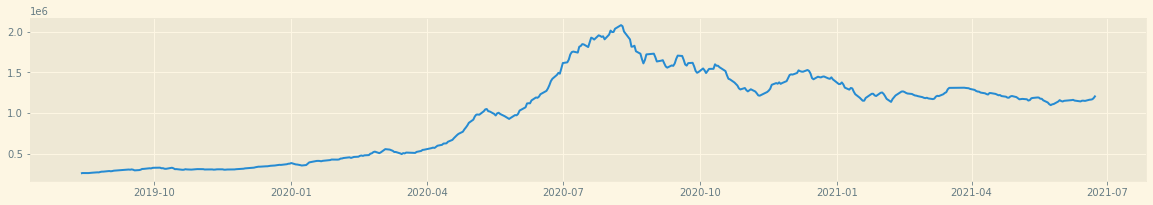

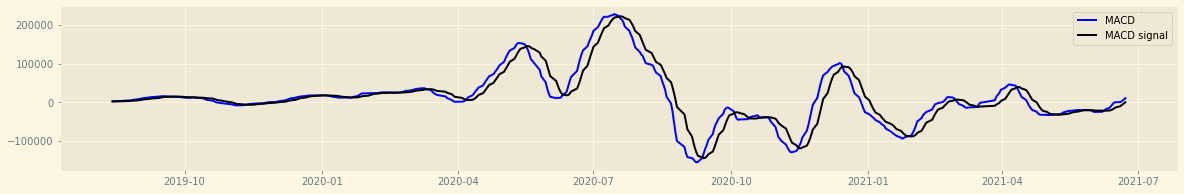

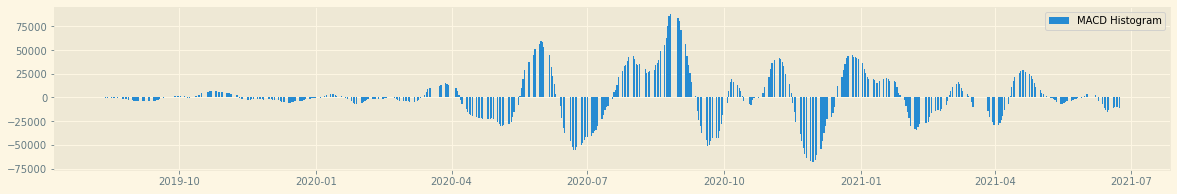

In [5]:
plt.figure(figsize = [20,3])
plt.plot(df['Close'].iloc[-450:])

plt.figure(figsize = [20,3])
plt.plot(MACD(df , 12 , 26 , 9)[0].iloc[-450:] , 'b-', label = 'MACD')
plt.plot(MACD(df , 12 , 26 , 9)[1].iloc[-450:] , 'k-', label = 'MACD signal')
plt.legend()

plt.figure(figsize = [20,3])
plt.bar(x = df.index[-450:] , height = MACD(df , 12 , 26 , 9)[2].iloc[-450:] , label = 'MACD Histogram')
plt.legend()

## Crafting RSI

In [6]:
def RSI(Data , days):
    
    tafazol_gheymat = Data['Close'].diff()
    
    tagheerate_mosbat = 0 * tafazol_gheymat
    tagheerate_manfi = 0 * tafazol_gheymat
    
    tagheerate_mosbat[tafazol_gheymat > 0] = tafazol_gheymat[tafazol_gheymat > 0]
    tagheerate_manfi[tafazol_gheymat < 0] = tafazol_gheymat[tafazol_gheymat < 0]
    
    Miyangin_tagheerate_mosbat = tagheerate_mosbat.rolling(days).mean()
    Miyangin_tagheerate_manfi = np.abs(tagheerate_manfi).rolling(days).mean()
    
    RS = Miyangin_tagheerate_mosbat / Miyangin_tagheerate_manfi
    
    RSI = 100 - (100 / (1+RS))
    
    return(RSI)

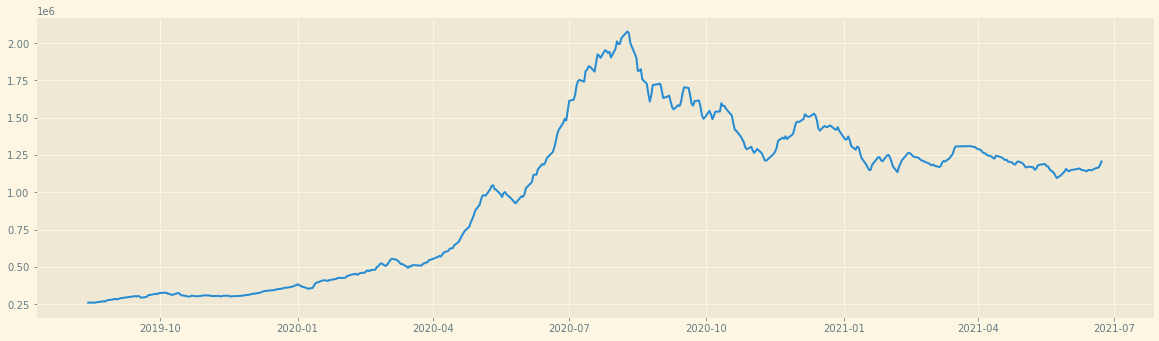

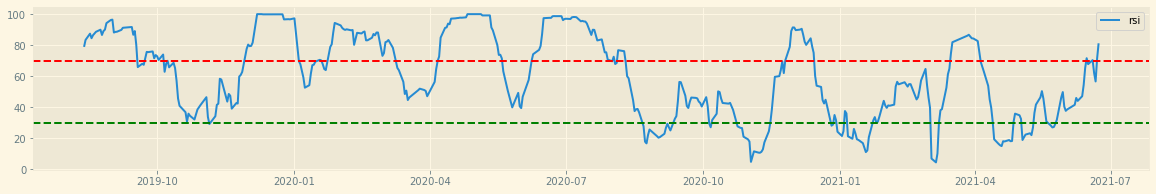

In [7]:
plt.figure(figsize = [20,5.5])
plt.plot(df['Close'].iloc[-450:])

plt.figure(figsize = [20,3])
plt.plot(RSI(df , 14).iloc[-450:] , label = 'rsi')
plt.axhline(y = 70 , linestyle = '--' , color = 'r')
plt.axhline(y = 30 , linestyle = '--' , color = 'g')
plt.legend()

## Market movement analysis (through different strategies)

In [8]:
df['1 day return'] = df['Close'].pct_change()
df['risk 2 days'] = df['1 day return'].rolling(2).var()

df['MACD'] = MACD(df , 12 , 26 , 9)[0]
df['MACD signal'] = MACD(df , 12 , 26 , 9)[1]
df['MACD histogram'] = MACD(df , 12 , 26 , 9)[2]

df['RSI'] = RSI(df , 14)

df['Volume 30 MA'] = df['Volume'].rolling(30).mean()
df['monthly risk'] = df['risk 2 days'].rolling(30).mean()

## Strategy 1

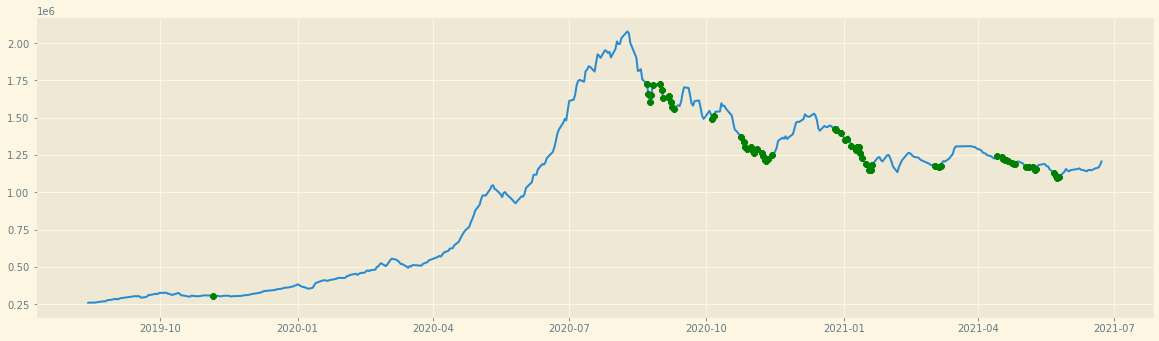

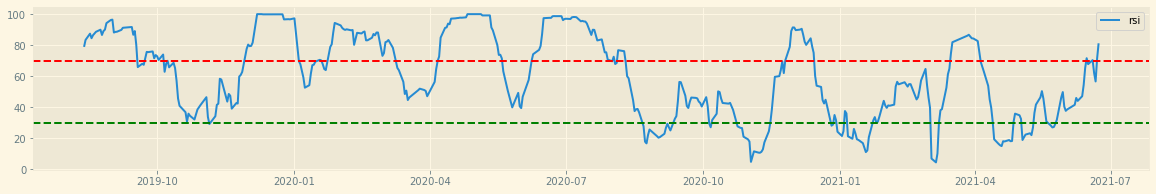

In [9]:
plt.figure(figsize = [20,5.5])
plt.plot(df['Close'].iloc[-450:])
plt.plot(df['Close'].iloc[-450:][df['RSI'] < 30] , 'g8')

plt.figure(figsize = [20,3])
plt.plot(RSI(df , 14).iloc[-450:] , label = 'rsi')
plt.axhline(y = 70 , linestyle = '--' , color = 'r')
plt.axhline(y = 30 , linestyle = '--' , color = 'g')
plt.legend()

## Strategy 2

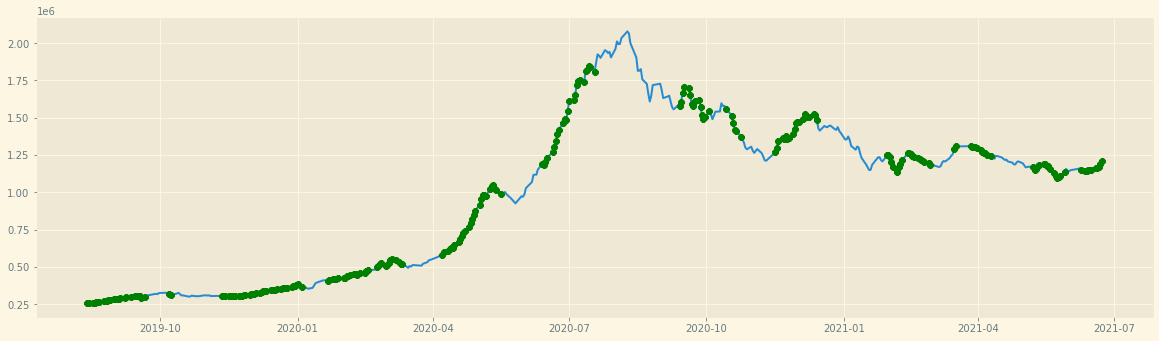

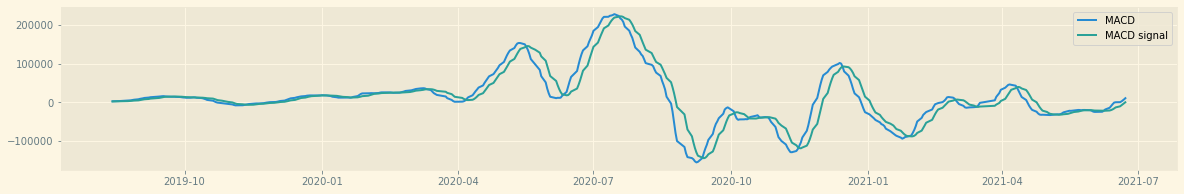

In [11]:
plt.figure(figsize = [20,5.5])
plt.plot(df['Close'].iloc[-450:])
plt.plot(df['Close'].iloc[-450:][ df['MACD'] > df['MACD signal'] ] , 'g8')

plt.figure(figsize = [20,3])
plt.plot(df['MACD'].iloc[-450:] , label = 'MACD')
plt.plot(df['MACD signal'].iloc[-450:] , label = 'MACD signal')
plt.legend()

## Strategy 3

In [ ]:
plt.figure(figsize = [20,5.5])
plt.plot(df['Close'].iloc[-450:])
plt.plot(df['Close'].iloc[-450:][ df['Volume'] > df['Volume 30 MA'] ] , 'g8')

plt.figure(figsize = [20,3])
plt.plot(df['Volume 30 MA'].iloc[-450:] , 'r' , label = '30 days average volume')
plt.bar(x = df.index[-450:] , height = df['Volume'].iloc[-450:] , label = 'Volume')
plt.legend()

## Strategy 3 (extended)

In [ ]:
plt.figure(figsize = [20,5.5])
plt.plot(df['Close'].iloc[-450:])
plt.plot(df['Close'].iloc[-450:][ (df['Open'] > df['Close'].shift()) & (df['Volume'] > df['Volume 30 MA']) ] , 'g8')
plt.plot(df['Close'].iloc[-450:][ (df['Open'] > df['Close'].shift()) & (df['Volume'] > df['Volume 30 MA']) & (df['risk 2 days'] < df['monthly risk']) ] , 'r*')


plt.figure(figsize = [20,3])
plt.plot(df['Volume 30 MA'].iloc[-450:] , 'r' , label = '30 days average volume')
plt.bar(x = df.index[-450:] , height = df['Volume'].iloc[-450:] , label = 'Volume')
plt.legend()

## Ta-lib (The convenient library for Technical analysis)

In [ ]:
df

In [ ]:
df['MACD talib'] , df['MACD signal talib'] , df['MACD histogram talib']= ta.MACD(df['Close'] , fastperiod=12 , slowperiod=26, 
                                                                                 signalperiod=9)

In [ ]:
plt.figure(figsize = [20,5])
plt.plot(df['MACD talib'][-450:]  , 'r-', label = 'MACD talib')
plt.plot(df['MACD signal talib'][-450:] , 'b-', label = 'MACD signal talib' )
plt.legend()


plt.figure(figsize = [20,5])
plt.plot(df['MACD'][-450:]  , 'r-', label = 'MACD dast saz')
plt.plot(df['MACD signal'][-450:] , 'b-', label = 'MACD signal dast saz')
plt.legend()

In [ ]:
df['RSI talib'] = ta.RSI(df['Close']  , timeperiod= 14)

In [ ]:
plt.figure(figsize = [20,4])
plt.plot(df['RSI'].iloc[-250:] , 'b-' , label = 'RSI dast saz')
plt.plot( df['RSI talib'].iloc[-250:], 'k-' , label = 'RSI talib' )
plt.axhline(y = 70 , linestyle = '--' , color = 'r')
plt.axhline(y = 30 , linestyle = '--' , color = 'g')
plt.legend()

In [ ]:
plt.figure(figsize = [20,4])
plt.plot(ta.LINEARREG(df['Close'][-250:], timeperiod=14) , 'b-' , label = 'Lnear regression')
plt.plot( df['Close'][-250:] , 'k-' , label = 'Close' )

plt.legend()


In [ ]:
import plotly.graph_objects as go

In [ ]:
Shakhes_burs_tehran = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

In [ ]:
Shakhes_burs_tehran

# Bonus Fact

In [ ]:
strategy = df['1 day return'].iloc[-450:][ df['MACD'] > df['MACD signal'] ] 

In [ ]:
pul_strategy = [1]
for i in range(0,len(strategy)):
    pul_strategy.append(pul_strategy[i] * (strategy[i]+1))

In [ ]:
plt.plot(pul_strategy)

In [ ]:
no_stra = df['1 day return'][-450:]
pul = [1]
for i in range(0 , len(no_stra)):
    pul.append(pul[i] * (no_stra[i]+1))

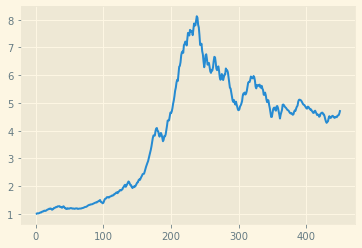

In [49]:
plt.plot(pul)